# A Brief Enquiry Into My Spotify Library

## Introduction

Not to toot my own horn, but I've always thought of myself as not just an average music listener. For some people whatever's playing on the radio is good enough and some people listen to music for heck of it. I am most certainly not like that. It's hard to put to words, that too on a jupyter notebook cell, how exactly music makes me feel and how I consume it. I spend hours after hours trying to curate the perfect playlist, be it for a mood or a feeling or a theme. I sit down and study lyrics to my favourite songs. I set mental reminders for dates when albums I've been anticipating drop. And wen they do, I sit down beside my speakers and listen to them. And do nothing else. I immerse myself in the experience of the new music. I make sure it has my undivided attention. So yeah, let's just say I take my music listening a bit too far at times.  

So all of these quirks got amplified 10 folds the day I got Spotify Premium. I got Spotify in August 2015 and life has not been the same since. Having spotify for me is like when a kid gets lost in a toy store. It's just that in my case I never want to be found. Just in 2017 alone, I listened to  3150 different songs from 707 different atrists of 63 different genres which totalled to 93, 079 minutes of music (stats courtesy of Spotify's Year In Review).

So anyway, given how strongly I feel about the music I consume and how I just learnt python and some data visualization, it's only normal for me to try to analyze the music I listen to. 

In this brief study, I'll be looking at the different tracks saved in my library and study their audio features and see if they can provide any insight to my taste and preferences. 

## My Library

In the 3 years that I've had spotify, I saved a total of 2351 songs to my library. I only save music that I really like and I know I'll be listening to again in the future. For the purpose of this study, I added all 2350 tracks in my library to a new playlist called 'library'.

## Spotify Audio Features

Spotify provides certain features for each song. These features or attributes are used by mathemetical models used in machine learning. Spotify uses these features to categorize each track into genres. It must be noted that these numbers may not be an extremely accurate representation of the tracks themselves. The features I'll be looking into in this study include:

* **acousticness** : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* **danceability** : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* **energy** : 	Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* **instrumentalness** : Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* **liveness** : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* **loudness** : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
* **speechiness** : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* **tempo** : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* **valence** : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* **popularity** : The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.

Information about audio features can be found __[here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/)__.

## Getting The Data
To get the data provided by Spotify, I used the __[Spotipy](https://spotipy.readthedocs.io/en/latest/#)__ library for the __[Spotify Web API](https://developer.spotify.com/documentation/web-api/)__. In order to use the Spotify Web API, A web application needs to be created an registered. The client id and the client secret for this application is used to authenticate the requests.

In [1]:
import sys
import os
import subprocess
import json
import spotipy
import spotipy.util as util
import pandas as pd


# Authenticating 

clientID = 'fe0898c6b6b9437089a24fe5255ad317'
clientSecret = 'c3bb9f4788764a22b5703416956a41f9'
redirect_uri = 'http://localhost:8888'
username = "tahsin.ac"

scope = 'playlist-read-private'
token = util.prompt_for_user_token(username
                                   , scope,client_id=clientID,
                                  client_secret=clientSecret,
                                  redirect_uri=redirect_uri)
if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [2]:
playlists = sp.user_playlists(username)

In [3]:
# Function for getting my playlists

def get_user_playlist(username, plname, sp):
    playlists = sp.user_playlists(username)
    for playlist in playlists['items']:
        if playlist['name'] == plname:
            id1 = playlist['id']
            print("Name: {}, Number of songs: {}, Playlist ID: {} ".
                  format(playlist['name'].encode('utf8'),
                         playlist['tracks']['total'],
                         playlist['id']))
    return id1

In [4]:
# Getting the playlist named 'library'

playlist_name = 'library'

In [5]:
playlist_id = get_user_playlist(username, playlist_name, sp)

Name: b'library', Number of songs: 2453, Playlist ID: 4jevMntsycU7R9BIP11Shl 


In [6]:
playlist = sp.user_playlist(username, playlist_id) 

# Getting songs from the playlist
songs = playlist["tracks"]["items"] 
tracks = playlist["tracks"]

# Getting track ids
ids = [] 
while tracks['next']:
    tracks = sp.next(tracks)
    for item in tracks["items"]:
        if (item['track']['id'] is not None):
            ids.append(item['track']['id'])

# Getting audio features
audio_features = []
for i in range(0,len(ids),50):    
    au_features = sp.audio_features(ids[i:i+50])
    for track in au_features:
        audio_features.append(track)  

In [146]:
# Making a list of features
features_list = []
for features in audio_features:
    features_list.append([features['id'], features['energy'], features['liveness'],
                              features['tempo'], features['speechiness'],
                              features['acousticness'], features['instrumentalness'],
                              features['danceability'],
                              features['key'], features['duration_ms'],
                              features['loudness'], features['valence'],
                              features['mode'], features['uri']])

In [8]:
# Making a dataframe of features
df = pd.DataFrame(features_list, columns=['track id', 'energy', 'liveness',
                                              'tempo', 'speechiness',
                                              'acousticness', 'instrumentalness',
                                              'danceability',
                                              'key', 'duration_ms', 'loudness',
                                              'valence', 'mode', 'uri'])

In [9]:
# Getting popularity
artist = []
track_name = []
popularity = []
for each in df['track id']:
    track1 = sp.track(each)
    tr_name = track1['name']
    track_name.append(tr_name)
    ar_name = track1['album']['artists'][0].get('name')
    artist.append(ar_name)
    pop = track1['popularity']
    popularity.append(pop)

In [10]:
# Merging dataframes

df2 = pd.DataFrame(track_name, columns = ['track name'])
df3 = pd.DataFrame(artist, columns = ['artist'])
df4 = pd.DataFrame(popularity, columns = ['popularity'])

df5 = pd.concat([df2,df3], axis = 1)
df6 = pd.concat([df5,df4], axis = 1)
finaldf = pd.concat([df6,df], axis = 1)

In [11]:
finaldf

,track name,artist,popularity,track id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,valence,mode,uri
0,Utrecht,il:lo,31,3ADoi5uRGmlmpNoR2LKXrM,0.700,0.3640,124.971,0.0270,0.269000,0.898000,0.604,9,376875,-8.799,0.2030,0,spotify:track:3ADoi5uRGmlmpNoR2LKXrM
1,Kozina,il:lo,28,25u7EZ4eiTiUP0IMPiGOVj,0.778,0.0808,110.010,0.0344,0.097800,0.907000,0.576,8,281313,-9.365,0.1180,0,spotify:track:25u7EZ4eiTiUP0IMPiGOVj
2,Concrete Heartbeat,The Lost Electric,15,3eXOzLl7KjJHoOPeXUsDAB,0.750,0.1390,179.954,0.0643,0.011800,0.000272,0.398,1,170965,-6.191,0.5400,0,spotify:track:3eXOzLl7KjJHoOPeXUsDAB
3,It's Not Getting Better,SPINN,46,18ajtDWQLG9sun19VXgyf3,0.871,0.2830,125.962,0.0364,0.002260,0.028800,0.594,8,240088,-5.512,0.6070,1,spotify:track:18ajtDWQLG9sun19VXgyf3
4,TOOTIMETOOTIMETOOTIME,The 1975,0,6wvlEKW2qxucJSBXYpMV2P,0.827,0.0860,115.014,0.0624,0.166000,0.016500,0.662,8,208742,-5.891,0.4770,1,spotify:track:6wvlEKW2qxucJSBXYpMV2P
5,Winter Song,Ingrid Michaelson,35,3hbjGZXUCqpn7E8c88qQvA,0.139,0.1330,81.137,0.0361,0.964000,0.000029,0.574,1,267267,-14.155,0.2280,1,spotify:track:3hbjGZXUCqpn7E8c88qQvA
6,306 ◑,HONNE,55,2Bjv8Dkxq9FYmGHcyqHRLF,0.587,0.2720,121.943,0.0353,0.063800,0.000000,0.725,6,235757,-7.284,0.4390,1,spotify:track:2Bjv8Dkxq9FYmGHcyqHRLF
7,Hearts,Blackbird Blackbird,53,0eBWx5UyJmmBVBgMGiEY7V,0.473,0.0843,149.971,0.0293,0.582000,0.899000,0.524,9,252000,-10.569,0.2200,0,spotify:track:0eBWx5UyJmmBVBgMGiEY7V
8,Hot Like Sauce,Pretty Lights,47,7zbq8RT5Kd3ExOGVTiUQbR,0.615,0.5610,89.994,0.0324,0.001340,0.040600,0.707,2,421332,-5.750,0.1130,1,spotify:track:7zbq8RT5Kd3ExOGVTiUQbR
9,Caves,Haux,32,6aJk1DTd869njAOo3rtbao,0.318,0.1230,130.110,0.0392,0.289000,0.397000,0.554,3,233240,-13.288,0.0565,0,spotify:track:6aJk1DTd869njAOo3rtbao


In [12]:
finaldf.shape

(2351, 17)

In [13]:
finaldf.to_csv('spotifylib.csv')

## Top Artists

In [28]:
top_artists = finaldf['artist'].value_counts()[0:40]
top_artists

Bon Jovi               104
The 1975                63
Ben Howard              61
John Mayer              52
U2                      45
Ryan Adams              38
Sticky Fingers          35
The Maine               34
LANY                    34
Work Drugs              33
The Killers             33
Tycho                   31
Mutemath                30
ODESZA                  30
Slipknot                28
Angels & Airwaves       27
Foster The People       27
Coldplay                26
Radiohead               26
Various Artists         25
The Wombats             25
Midnight Faces          23
blink-182               23
The Goo Goo Dolls       23
James Blunt             23
A Blaze of Feather      21
BØRNS                   21
The War On Drugs        20
Phoenix                 19
City of the Sun         19
The xx                  19
Death Cab for Cutie     18
M83                     18
Matchbox Twenty         18
Peace                   17
Aerosmith               17
Bear's Den              17
S

Here, we look at the top 40 artists(by number of tracks saved) in my library. Bon jovi being number 1 is no surprise as they were my favourite band growing up and have been around for around 30 years now. Infact there are no surprises here. If someone were to ask me to name my favourite bands/artsists, I would probably hand them this list over here.

In [30]:
((top_artists.iloc[:].sum())/(finaldf.shape[0]))*100

49.766056997022545

Top 40 artists make up about 50% of my library, meaning half of my library consists of not too many tracks from the same artists.

## Most Energetic Tracks

In [124]:
finaldf.sort_values('energy', ascending = False)[0:5]

,track name,artist,popularity,track id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,valence,mode,uri
1248,Eyeless,Slipknot,57,7MEHTWzEi3z7P2jEWAcdHZ,0.997,0.4150,100.348,0.217,0.000463,0.000039,0.293,4,236360,-4.364,0.130,0,spotify:track:7MEHTWzEi3z7P2jEWAcdHZ
1247,Wait And Bleed,Slipknot,67,2gscB6kDOmrv1P6qs2KXE3,0.996,0.4170,93.345,0.104,0.002080,0.000000,0.382,7,147840,-4.119,0.327,1,spotify:track:2gscB6kDOmrv1P6qs2KXE3
1238,Pulse Of The Maggots,Slipknot,54,0at89DgpVeImkVrQ0htbVm,0.994,0.2280,87.469,0.291,0.003010,0.000003,0.218,7,259733,-2.222,0.112,1,spotify:track:0at89DgpVeImkVrQ0htbVm
681,New Abortion,Slipknot,39,2xFZNy2zdXgMCjjLnIRm96,0.994,0.4340,111.737,0.252,0.000076,0.008480,0.327,11,216600,-4.023,0.160,0,spotify:track:2xFZNy2zdXgMCjjLnIRm96
457,Miss You,Foster The People,52,2aCsRmHTuWPL7WnL5uSijc,0.994,0.0954,120.994,0.184,0.021400,0.016600,0.625,0,212893,-3.951,0.113,0,spotify:track:2aCsRmHTuWPL7WnL5uSijc


## High Tempo Tracks

In [125]:
finaldf.sort_values('tempo', ascending = False)[0:5]

,track name,artist,popularity,track id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,valence,mode,uri
1665,Keep The Car Running,The Goo Goo Dolls,29,56hrxrPNeaiI8GlJMKKVUB,0.953,0.1110,217.763,0.0735,0.000184,0.000002,0.334,0,245053,-3.386,0.4450,1,spotify:track:56hrxrPNeaiI8GlJMKKVUB
2098,Everything's Magic,Angels & Airwaves,17,36MYc1F10s4Xlph5puV74f,0.936,0.0791,215.942,0.0426,0.000040,0.000358,0.414,0,233160,-3.802,0.9000,1,spotify:track:36MYc1F10s4Xlph5puV74f
1399,Shelter,The xx,52,4FfdmvdBN0LnLENhgJrpdQ,0.374,0.1070,214.998,0.0822,0.794000,0.526000,0.266,0,270240,-15.709,0.0548,1,spotify:track:4FfdmvdBN0LnLENhgJrpdQ
1223,Shelter,Various Artists,44,7xJVqlf0xVCgNTaFXpVD9C,0.377,0.1070,214.131,0.0797,0.802000,0.536000,0.265,0,270240,-15.678,0.0621,1,spotify:track:7xJVqlf0xVCgNTaFXpVD9C
1522,Fuss,Redspencer,11,7DM8FLLFUrr3200En2qkQe,0.647,0.0402,205.988,0.0317,0.086200,0.000068,0.494,1,179644,-6.663,0.8550,0,spotify:track:7DM8FLLFUrr3200En2qkQe


## Low Tempo Tracks

In [126]:
finaldf.sort_values('energy', ascending = True)[0:5]

,track name,artist,popularity,track id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,valence,mode,uri
646,You,The 1975,46,1vrXDFIfPVfDOH2rM7gFnc,0.0133,0.1590,138.006,0.0566,0.00645,0.004030,0.215,0,591160,-6.101,0.9660,1,spotify:track:1vrXDFIfPVfDOH2rM7gFnc
1463,Interlude,City of the Sun,26,3k0sKtSeUTkJt8cs0MKfqO,0.0266,0.1120,69.638,0.0401,0.96100,0.745000,0.211,5,264020,-32.667,0.0536,0,spotify:track:3k0sKtSeUTkJt8cs0MKfqO
91,All Down The Mines (Interlude),Ben Howard,50,4vHN56BfR7toxVuy3LHB9n,0.0271,0.1510,112.742,0.0344,0.98400,0.013500,0.273,0,46880,-25.859,0.2840,1,spotify:track:4vHN56BfR7toxVuy3LHB9n
1834,Is There Somebody Who Can Watch You,The 1975,39,2VDa2otNoSAsa10XmmZoFB,0.0305,0.0851,112.909,0.0497,0.92300,0.000985,0.372,11,175568,-19.162,0.1070,1,spotify:track:2VDa2otNoSAsa10XmmZoFB
1053,Watching The Boats With My Dad,Buckethead,31,5PdijRkZTyfn6v05wGuC9U,0.0354,0.1100,142.100,0.0465,0.92900,0.897000,0.464,8,306693,-15.864,0.0388,1,spotify:track:5PdijRkZTyfn6v05wGuC9U


## Most Acoustic Tracks

In [127]:
finaldf.sort_values('acousticness', ascending = False)[0:5]

,track name,artist,popularity,track id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,valence,mode,uri
1688,A Song for the Stars,Mree,0,0c9BCg613ULKA1fOuh8HtJ,0.0373,0.1120,69.439,0.0361,0.991,0.851,0.281,5,259880,-22.952,0.0602,1,spotify:track:0c9BCg613ULKA1fOuh8HtJ
2225,Crinan Wood,Alexi Murdoch,0,3yDM8SJCGuPgOckHHnWauD,0.1520,0.0668,136.646,0.0371,0.989,0.633,0.439,3,523080,-18.313,0.1090,1,spotify:track:3yDM8SJCGuPgOckHHnWauD
1776,How To Draw,The 1975,8,6CdRHIFbZoKqZwiWpUxkvC,0.0773,0.0603,75.669,0.0434,0.989,0.547,0.136,6,243385,-20.646,0.0667,1,spotify:track:6CdRHIFbZoKqZwiWpUxkvC
1689,Lullaby,Mree,0,36mavtvGzx3Ndmpr23LWwe,0.1300,0.0916,94.942,0.0311,0.989,0.708,0.470,9,159267,-16.919,0.0986,1,spotify:track:36mavtvGzx3Ndmpr23LWwe
705,The Haunting Idle,The War On Drugs,7,5lGcNW4gwFnpRJS9PjWszc,0.1740,0.1170,65.578,0.0360,0.989,0.880,0.148,9,187933,-15.931,0.1860,0,spotify:track:5lGcNW4gwFnpRJS9PjWszc


## Most Danceable Tracks

In [128]:
finaldf.sort_values('danceability', ascending = False)[0:5]

,track name,artist,popularity,track id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,valence,mode,uri
405,Beautiful Escape,Tom Misch,64,5MChi9fdCbTIWDJPPUuuW6,0.514,0.103,120.004,0.1950,0.0684,0.002090,0.944,5,276785,-7.895,0.331,1,spotify:track:5MChi9fdCbTIWDJPPUuuW6
1400,Basic Space,The xx,52,16NE62lzGmi6ehGTNVI659,0.212,0.105,115.877,0.0766,0.2020,0.082100,0.943,9,188120,-15.216,0.139,0,spotify:track:16NE62lzGmi6ehGTNVI659
386,Dat $tick,Rich Brian,70,4bdJHQp90ymjEIkkYhcENB,0.508,0.126,108.039,0.0468,0.1040,0.000012,0.923,1,126667,-8.668,0.168,1,spotify:track:4bdJHQp90ymjEIkkYhcENB
341,Paper Planes,Tom Misch,46,0lDwHUTYpubf7cgRlyArq2,0.434,0.127,111.999,0.0368,0.4170,0.000057,0.913,7,199554,-9.223,0.390,1,spotify:track:0lDwHUTYpubf7cgRlyArq2
760,Rawnald Gregory Erickson the Second,STRFKR,61,4j4pPKE3xAblPIbhxScC1j,0.538,0.287,95.508,0.0343,0.2290,0.843000,0.900,7,173693,-7.879,0.713,1,spotify:track:4j4pPKE3xAblPIbhxScC1j


The results here are somewhat surprising. The tracks listed here aren't what I would call danceable. In fact, my library most definitely has tracks that I actually did dance too. These tracks include club favourites such as Alone by Marshmello.

## Loudest Tracks

In [129]:
finaldf.sort_values('loudness', ascending = False)[0:5]

,track name,artist,popularity,track id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,valence,mode,uri
697,Custer,Slipknot,45,2PV3xcnPI7QMayUpGB4Xkv,0.980,0.1190,131.066,0.1070,0.00174,0.000112,0.407,7,254467,-1.580,0.537,1,spotify:track:2PV3xcnPI7QMayUpGB4Xkv
1250,The Negative One,Slipknot,44,7ig2YgdUh5RJZhLVPuJfnG,0.979,0.3340,108.200,0.0715,0.00020,0.001350,0.505,0,325171,-1.665,0.312,1,spotify:track:7ig2YgdUh5RJZhLVPuJfnG
1605,How The Other Half Live,Tribes,16,60Uk1X41Tvu6VLqqb1l0CI,0.853,0.2700,171.926,0.0330,0.00213,0.000000,0.321,5,190300,-1.832,0.397,1,spotify:track:60Uk1X41Tvu6VLqqb1l0CI
1244,Psychosocial,Slipknot,72,2MvIMgtWyK88OiPi0J8Dg3,0.989,0.0243,135.093,0.1120,0.00252,0.003200,0.576,2,283400,-1.909,0.352,1,spotify:track:2MvIMgtWyK88OiPi0J8Dg3
387,Feel Good,Paperplane Pursuit,25,2TvhUVrhbM57HE0Bi5YAQB,0.820,0.7690,113.003,0.0440,0.24000,0.000000,0.826,6,186903,-2.019,0.960,1,spotify:track:2TvhUVrhbM57HE0Bi5YAQB


## Happiest Tracks

In [130]:
finaldf.sort_values('valence', ascending = False)[0:5]

,track name,artist,popularity,track id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,valence,mode,uri
1798,Hey Julie,Fountains Of Wayne,47,2LGAbm0xHNu7scBDVCkFwN,0.5540,0.0786,137.013,0.0363,0.39100,0.000000,0.739,7,156933,-5.668,0.978,1,spotify:track:2LGAbm0xHNu7scBDVCkFwN
1121,Harder To Breathe,Maroon 5,47,4FDjkgw75Lr0VEx5vOTGCk,0.9050,0.0509,149.907,0.0448,0.05250,0.000000,0.661,1,173693,-4.739,0.967,0,spotify:track:4FDjkgw75Lr0VEx5vOTGCk
422,Chit Chat,Beach Weather,27,12ppEnIuYOVA1ctBsH7HS8,0.9780,0.3280,142.122,0.0560,0.00025,0.168000,0.514,11,200207,-2.779,0.966,0,spotify:track:12ppEnIuYOVA1ctBsH7HS8
646,You,The 1975,46,1vrXDFIfPVfDOH2rM7gFnc,0.0133,0.1590,138.006,0.0566,0.00645,0.004030,0.215,0,591160,-6.101,0.966,1,spotify:track:1vrXDFIfPVfDOH2rM7gFnc
570,American Fool,Work Drugs,10,0f5sOPI0kouU93bsypSnej,0.6050,0.3780,117.050,0.0317,0.23000,0.000007,0.765,4,208237,-9.238,0.965,0,spotify:track:0f5sOPI0kouU93bsypSnej


## Saddest Tracks

In [132]:
finaldf.sort_values('valence', ascending = True)[0:5]

,track name,artist,popularity,track id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,valence,mode,uri
1466,Winter 2011,City of the Sun,26,5cEZ9QfHu5YeayE8utCIuX,0.0661,0.0820,82.413,0.0373,0.792000,0.713000,0.221,10,341020,-19.947,0.0320,1,spotify:track:5cEZ9QfHu5YeayE8utCIuX
1835,Facedown,The 1975,39,66mhOWjoTLTXm7y7V1eHRs,0.4260,0.0665,141.116,0.0383,0.108000,0.299000,0.141,4,169005,-12.130,0.0331,1,spotify:track:66mhOWjoTLTXm7y7V1eHRs
1253,XIX,Slipknot,43,5MlsjZyOq3FDBWC3Jsys9N,0.5800,0.9630,130.466,0.0564,0.457000,0.000419,0.259,4,190147,-8.203,0.0334,1,spotify:track:5MlsjZyOq3FDBWC3Jsys9N
1398,Fantasy,The xx,50,6zwUw48YOZL1CE8toS0WGN,0.0806,0.1100,63.164,0.0411,0.686000,0.901000,0.150,8,158240,-15.495,0.0345,1,spotify:track:6zwUw48YOZL1CE8toS0WGN
1707,Klaus I Love You,M83,10,4glH9fjcMsNrDQFC99ZoFD,0.7250,0.3040,117.123,0.0404,0.000022,0.281000,0.441,6,104533,-9.639,0.0347,0,spotify:track:4glH9fjcMsNrDQFC99ZoFD


The audio feature valence only takes into account weather a track *sounds* happy or sad. It does not take lyrical content into consideration. Even then, I feel like the tracks listed here are not the saddest sounding in my library. Although, the tracks listed here are sad, according to me, the saddast songs in my library are by Radiohead, Ben Howard, From Indian Lakes and The National. 

## Correlations Between Audio Features

In [133]:
finaldf.corr()

,popularity,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,valence,mode
popularity,1.000000,0.031943,-0.043102,-0.005811,0.094263,-0.030205,-0.088146,0.073104,0.004682,-0.062660,0.054494,0.033977,-0.012571
energy,0.031943,1.000000,0.225149,0.173439,0.252274,-0.735060,-0.204211,0.067862,0.009470,-0.036877,0.806452,0.415076,-0.047662
liveness,-0.043102,0.225149,1.000000,0.012868,0.116673,-0.151982,-0.048857,-0.067855,-0.002060,-0.001684,0.169946,0.096198,-0.000878
tempo,-0.005811,0.173439,0.012868,1.000000,0.088547,-0.107247,-0.003848,-0.161049,-0.010005,0.016848,0.106155,0.069761,0.011519
speechiness,0.094263,0.252274,0.116673,0.088547,1.000000,-0.136251,-0.100081,-0.057513,0.035777,-0.046529,0.164088,0.051202,-0.060647
acousticness,-0.030205,-0.735060,-0.151982,-0.107247,-0.136251,1.000000,0.238229,-0.069261,-0.022466,0.029207,-0.677372,-0.315543,0.049201
instrumentalness,-0.088146,-0.204211,-0.048857,-0.003848,-0.100081,0.238229,1.000000,-0.121446,0.024697,0.156179,-0.395017,-0.236737,-0.077889
danceability,0.073104,0.067862,-0.067855,-0.161049,-0.057513,-0.069261,-0.121446,1.000000,0.020227,-0.220200,0.116083,0.439522,-0.074852
key,0.004682,0.009470,-0.002060,-0.010005,0.035777,-0.022466,0.024697,0.020227,1.000000,0.008801,-0.025267,0.051096,-0.122752
duration_ms,-0.062660,-0.036877,-0.001684,0.016848,-0.046529,0.029207,0.156179,-0.220200,0.008801,1.000000,-0.056007,-0.238149,-0.057780


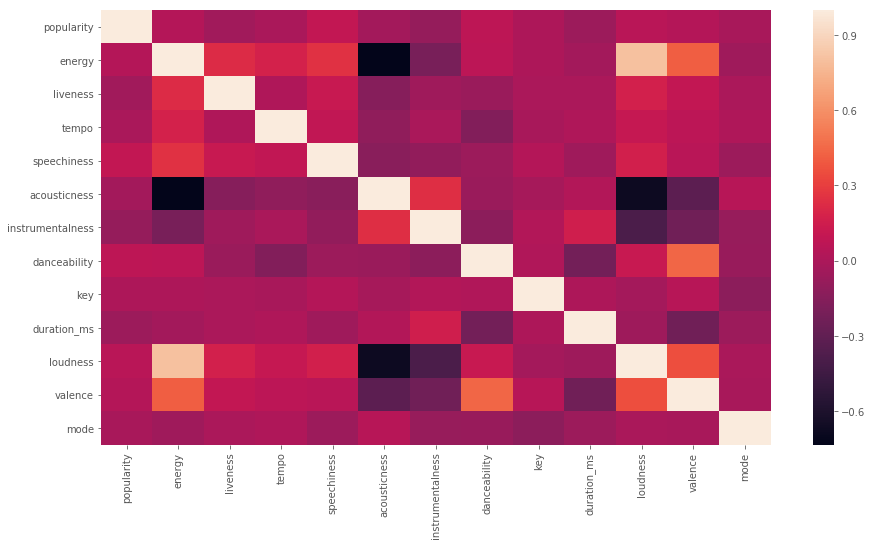

In [136]:
fig = plt.figure(figsize = (15,8))
sns.heatmap(finaldf.corr(), xticklabels=finaldf.corr().columns, yticklabels=finaldf.corr().columns)

In [137]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#ener-spe, ener-lod, ener-val, acou-val, inst-acou, inst-loud, danc-dura, dura- val, loud-val

Text(0,0.5,'loudness')

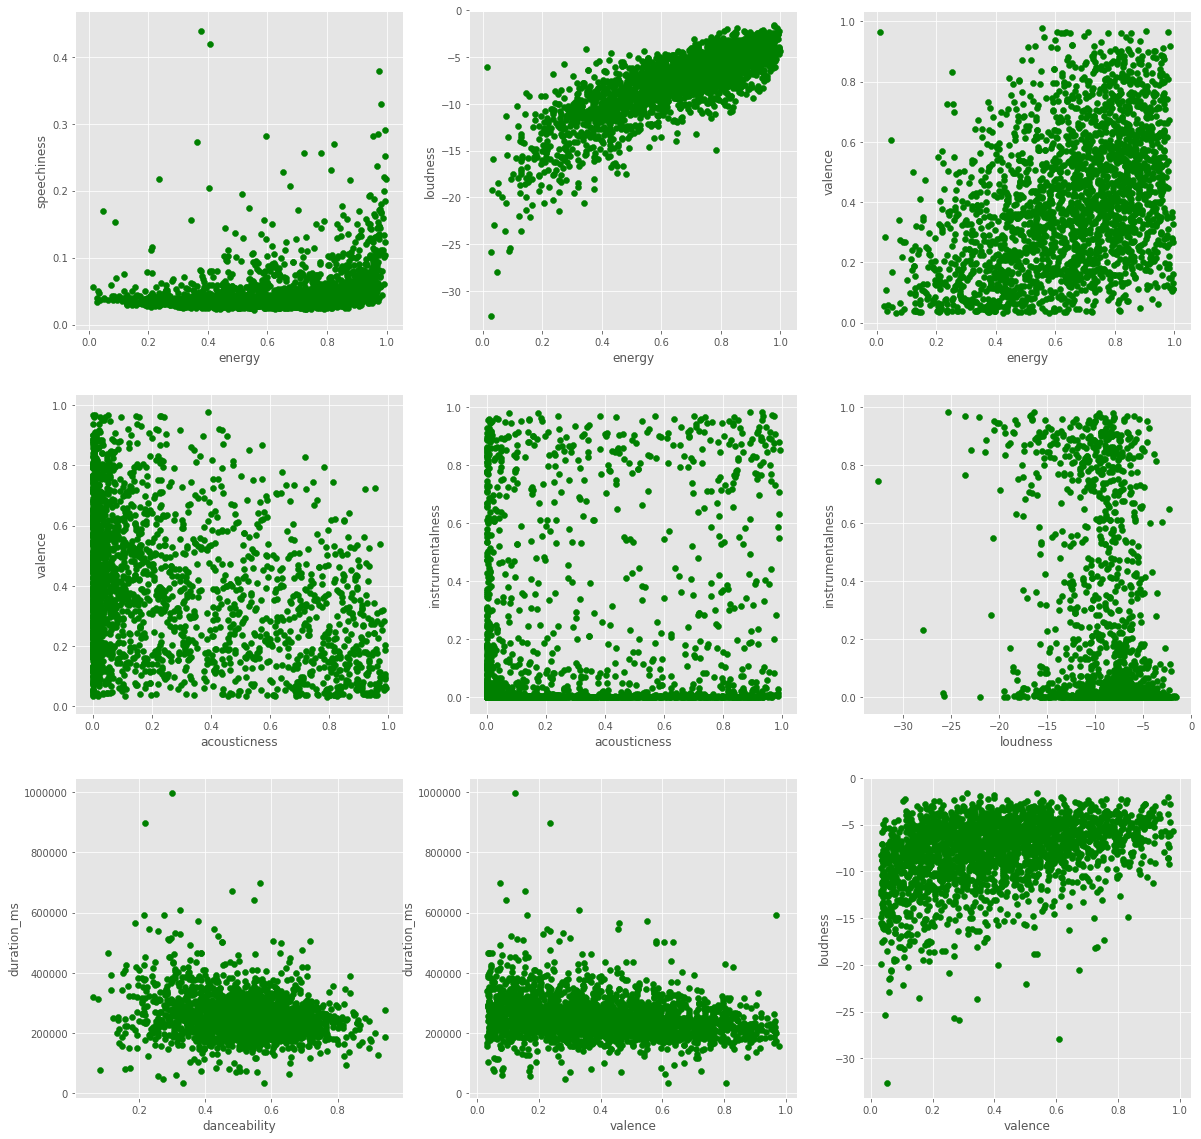

In [145]:
fig = plt.figure(figsize = (20,20))

ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)
ax9 = fig.add_subplot(3, 3, 9)

ax1.scatter(finaldf['energy'], finaldf['speechiness'], c= 'green')
ax1.set_xlabel('energy')
ax1.set_ylabel('speechiness')

ax2.scatter(finaldf['energy'], finaldf['loudness'], c= 'green')
ax2.set_xlabel('energy')
ax2.set_ylabel('loudness')

ax3.scatter(finaldf['energy'], finaldf['valence'], c= 'green')
ax3.set_xlabel('energy')
ax3.set_ylabel('valence')

ax4.scatter(finaldf['acousticness'], finaldf['valence'], c= 'green')
ax4.set_xlabel('acousticness')
ax4.set_ylabel('valence')

ax5.scatter(finaldf['acousticness'], finaldf['instrumentalness'], c= 'green')
ax5.set_xlabel('acousticness')
ax5.set_ylabel('instrumentalness')

ax6.scatter(finaldf['loudness'], finaldf['instrumentalness'], c= 'green')
ax6.set_xlabel('loudness')
ax6.set_ylabel('instrumentalness')

ax7.scatter(finaldf['danceability'], finaldf['duration_ms'], c= 'green')
ax7.set_xlabel('danceability')
ax7.set_ylabel('duration_ms')

ax8.scatter(finaldf['valence'], finaldf['duration_ms'], c= 'green')
ax8.set_xlabel('valence')
ax8.set_ylabel('duration_ms')

ax9.scatter(finaldf['valence'], finaldf['loudness'], c= 'green')
ax9.set_xlabel('valence')
ax9.set_ylabel('loudness')

Here, I was hoping to find some sort of correlation between popularity and other audio features so that I could understand what features can make a popular track. There isn't any strong correlations between any of the features expect loudness and energy, which show a strong positive correlation. This is expected as louder songs are more energetic.

## Audio Features

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Text(0.8,325,'$\\mu$ = 0.4')

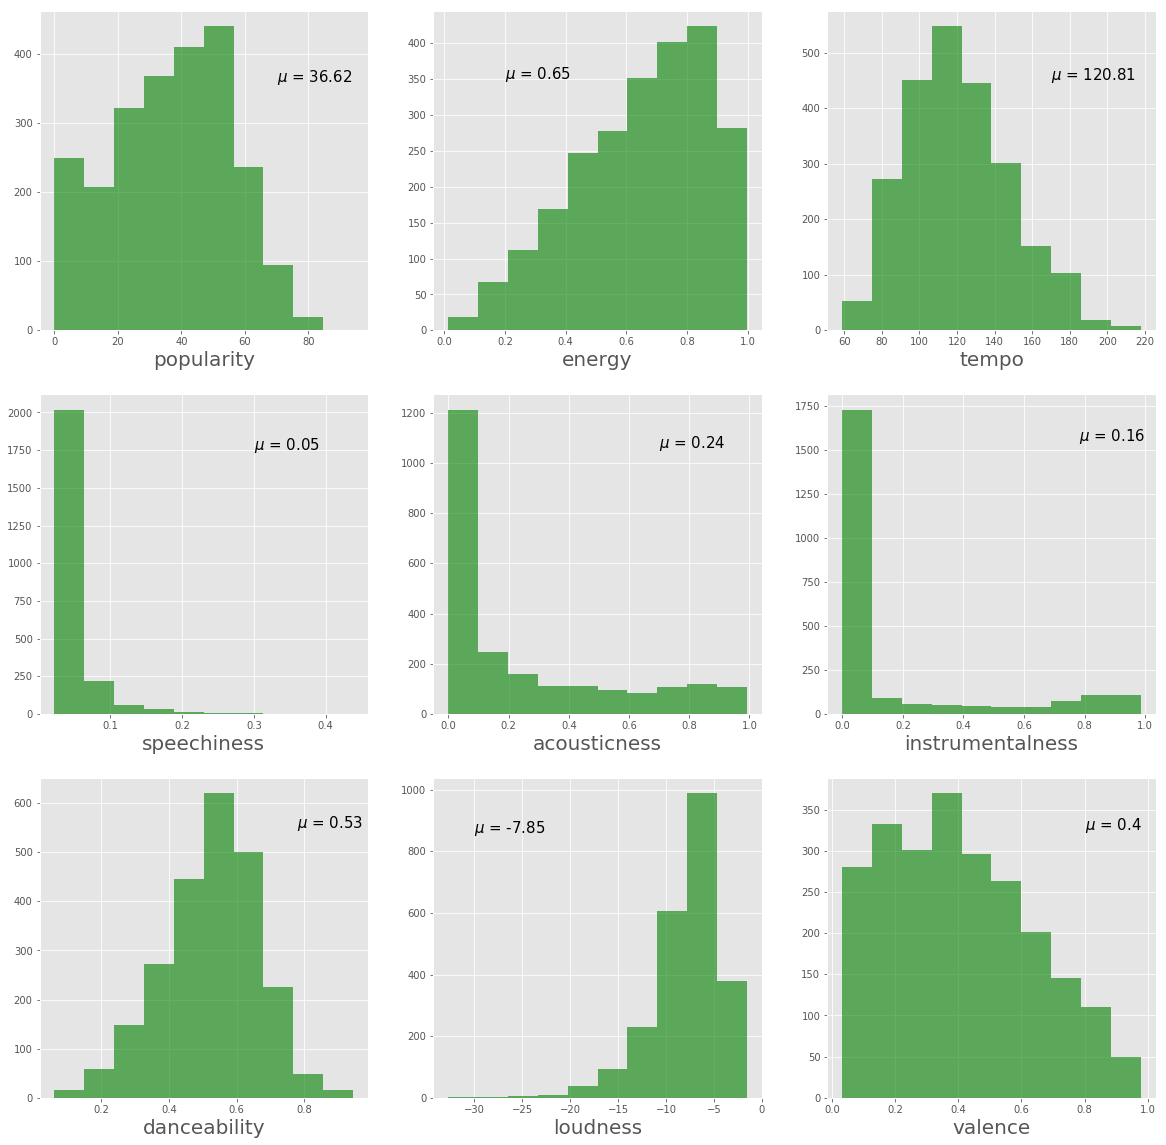

In [161]:
hist_features = ['popularity', 'energy', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'danceability', 'loudness', 'valence']

fig = plt.figure(figsize = (20,20))

ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)
ax9 = fig.add_subplot(3, 3, 9)
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

for i in range(9):
    ax[i].hist(finaldf[hist_features[i]], color = 'green', alpha = 0.6)
    ax[i].set_xlabel(hist_features[i], fontsize = 20)
    
ax1.text(70, 360, '$\\mu$ = ' +str(round(finaldf['popularity'].mean(),2)), fontsize = 15)
ax2.text(0.2, 350, '$\\mu$ = ' +str(round(finaldf['energy'].mean(),2)), fontsize = 15)
ax3.text(170, 450, '$\\mu$ = ' +str(round(finaldf['tempo'].mean(),2)), fontsize = 15)
ax4.text(0.30, 1750, '$\\mu$ = ' +str(round(finaldf['speechiness'].mean(),2)), fontsize = 15)
ax5.text(0.70, 1060, '$\\mu$ = ' +str(round(finaldf['acousticness'].mean(),2)), fontsize = 15)
ax6.text(0.78, 1550, '$\\mu$ = ' +str(round(finaldf['instrumentalness'].mean(),2)), fontsize = 15)
ax7.text(0.78, 550, '$\\mu$ = ' +str(round(finaldf['danceability'].mean(),2)), fontsize = 15)
ax8.text(-30, 860, '$\\mu$ = ' +str(round(finaldf['loudness'].mean(),2)), fontsize = 15)
ax9.text(0.8, 325, '$\\mu$ = ' +str(round(finaldf['valence'].mean(),2)), fontsize = 15)



The histogram distributions depict a descriptive overview of tha average song I'd like.

Although I listen to a somewhat wide variety of music, if I had to pick a few genres to call my favourite, I'd have to go with indie rock, alternative rock and some folk rock and none of these genres are what you'd call 'popular'. Popular is whatever Drake makes, whatever Riahanna makes and whatever trap music is. So it's no surprise there's a large bump below 50 in the popularity distribution. 

Rock music tend to be louder than other kinds which is why the loudness and energy distribution are left skewed.

The distributions for danceability andtempo resemble a normal distribution.

The disttribution for valence shows that a large portion of music in my library *sound* sad.

## Comparison With Popular Music

In this part, I try to analyze how audio features for popular tracks are different from those in my library. To do this I first made a new playlist named 'globaltop' made up of tracks from Spotify's Global Top 50 which is contains the most played tracks on spotify and is updated daily. I saved the data for these tracks to a csv file named globaltop_1.csv in the same way as I did for my library.

In [149]:
# Reading in the file
globaltop = pd.read_csv('globaltop50_1.csv')

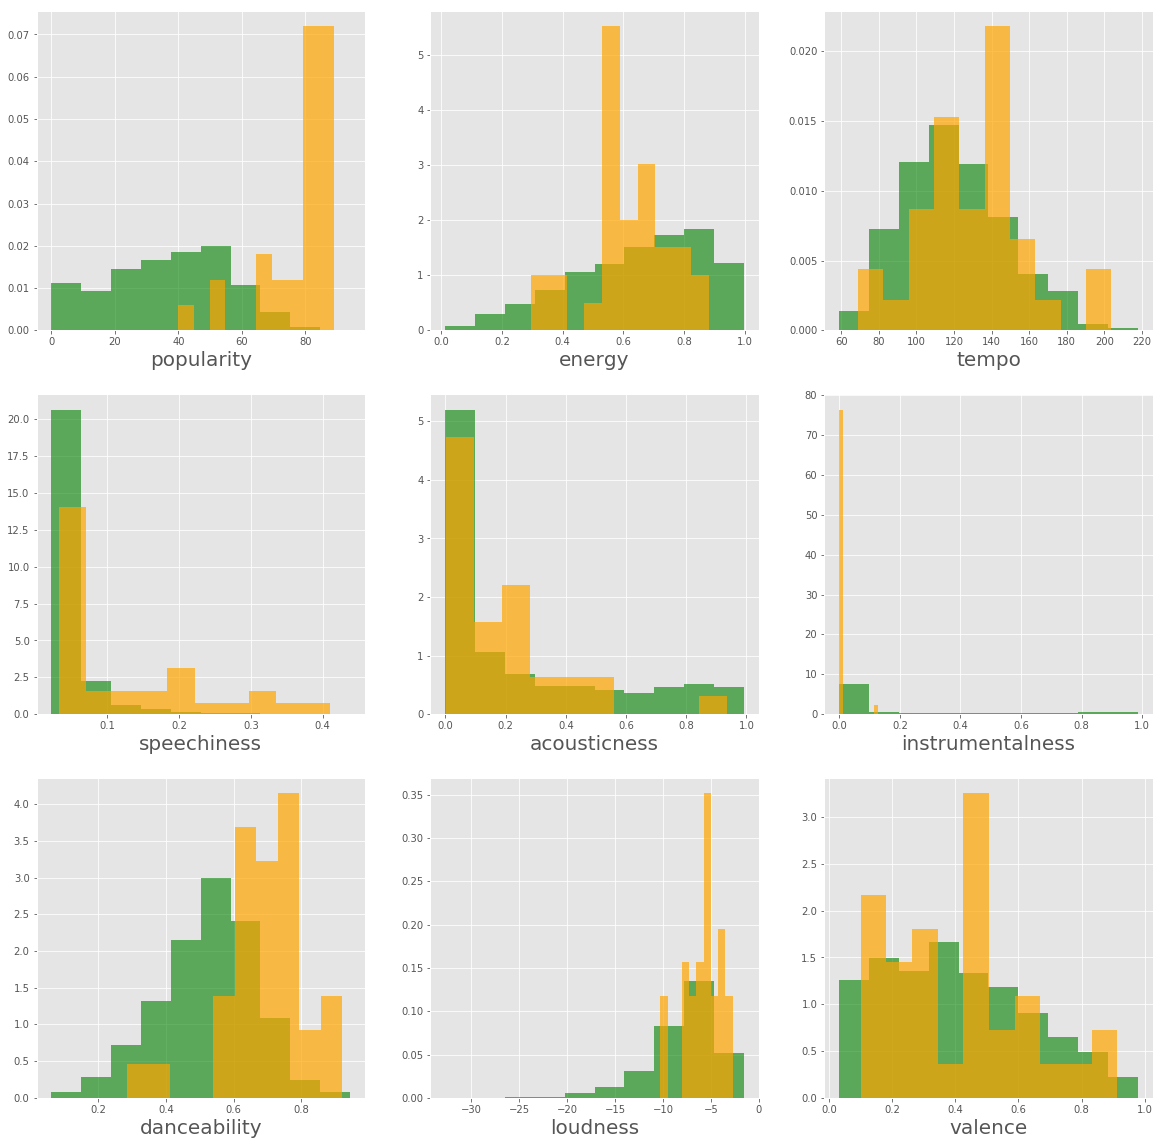

In [163]:
hist_features = ['popularity', 'energy', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'danceability', 'loudness', 'valence']

fig = plt.figure(figsize = (20,20))

ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)
ax9 = fig.add_subplot(3, 3, 9)
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

for i in range(9):
    ax[i].hist(finaldf[hist_features[i]], color = 'green', alpha = 0.6, density = True)
    ax[i].hist(globaltop[hist_features[i]], color = 'orange', alpha = 0.7, density = True)
    ax[i].set_xlabel(hist_features[i], fontsize = 20)

In [193]:
x = pd.DataFrame(finaldf.mean())
y = pd.DataFrame(globaltop.mean())

mean_compare = pd.concat([x,y], axis = 1, sort = False)
mean_compare.columns = (['my library', 'globaltop50'])
mean_compare['% difference'] = round(((mean_compare['my library'] - mean_compare['globaltop50'])/mean_compare['my library']) * 100, 1)
mean_compare
mean_compare.drop(['key', 'mode', 'Unnamed: 0', 'duration_ms'])

,my library,globaltop50,% difference
popularity,36.624840,78.764706,-115.1
energy,0.649206,0.617618,4.9
liveness,0.176156,0.131997,25.1
tempo,120.811217,130.591235,-8.1
speechiness,0.048031,0.124394,-159.0
acousticness,0.243452,0.179400,26.3
instrumentalness,0.158902,0.003756,97.6
danceability,0.525374,0.691794,-31.7
loudness,-7.846707,-5.728294,27.0
valence,0.402975,0.407529,-1.1


The mean popularity of the tracks in globaltop is more than twice as high as that for my library. The biggest differences between my library and popular music are for speechiness and instrumentalness. This may be because popular music include rap, trap and grime music which generally are more 'speechy'than rock music. The difference in instrumentalness may be because rock music generally have guitar solos or licks or riffs. 